# Hotel Booking Data Analysis - Part II: Data Analysis
The dataset has been cleaned and prepared, as demonstrated in **[Hotel Booking Data Analysis - Part I: Data Cleaning](https://github.com/AshleighJW/side_projects/blob/master/hotel_booking_dataset/script_data_cleaning.ipynb)**.   

This dataset stores the booking information in the property management system (PMS) of **a resort hoetl** and **a city hotel**. They are located in the resort region of Algarve and the city of Lisbon in Portugal. There are **35333** data entries of the resort hotel, **71430** of the city hotel. All data were collected between **1 July 2015** and **30 June 2017**.

## Goal
The following aspects of the dataset is investigated in this analysis:
- How does the cancelation rate look like? Is it especially higher for any market segmentation?
- What are the common profiles shared by the repeat customers?
- Does the current room type configuration meet the demand?

The analysis will be performed for the two hotels separately.

#### Load the data

In [1]:
# Load necessary modules and read in the data
from IPython.core.debugger import set_trace as st
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
resort_h = pd.read_excel('all_bookings_clean.xlsx', index_col=0, sheet_name='rh')
city_h = pd.read_excel('all_bookings_clean.xlsx', index_col=0, sheet_name='ch')

First let's have a look at the overview of the data.    
  
**The Resort Hotel**

In [3]:
resort_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35333 entries, 0 to 35332
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   is_canceled                35333 non-null  int64         
 1   lead_time                  35333 non-null  int64         
 2   arrival_date_year          35333 non-null  int64         
 3   arrival_date_month         35333 non-null  int64         
 4   arrival_date_day_of_month  35333 non-null  int64         
 5   meal                       35333 non-null  object        
 6   country                    35333 non-null  object        
 7   market_segment             35333 non-null  object        
 8   is_repeated_guest          35333 non-null  int64         
 9   reserved_room_type         35333 non-null  object        
 10  assigned_room_type         35333 non-null  object        
 11  days_in_waiting_list       35333 non-null  int64         
 12  cust

**The City Hotel**

In [4]:
city_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71430 entries, 0 to 71429
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   is_canceled                71430 non-null  int64         
 1   lead_time                  71430 non-null  int64         
 2   arrival_date_year          71430 non-null  int64         
 3   arrival_date_month         71430 non-null  int64         
 4   arrival_date_day_of_month  71430 non-null  int64         
 5   meal                       71430 non-null  object        
 6   country                    71430 non-null  object        
 7   market_segment             71430 non-null  object        
 8   is_repeated_guest          71430 non-null  int64         
 9   reserved_room_type         71430 non-null  object        
 10  assigned_room_type         71430 non-null  object        
 11  days_in_waiting_list       71430 non-null  int64         
 12  cust

Since all the data are clean and prepared, they are ready for the analysis.

## Analyse Booking Cancelation Rate
It is important to keep an eye on the cancelation rate. Once it falls beyond the normal range we need to figure out the possible causes and tackle the issue as soon as possible.

### 1. Overall cancelation rate

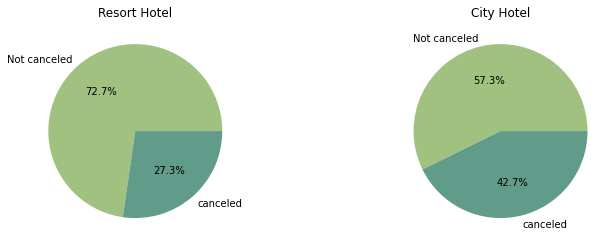

In [5]:
# The suffix '_rh' represents the data/measure related to the resort hotel, the suffix '_ch' represents those related to the 
# city hotel. 
cancel_rh = resort_h['is_canceled'].value_counts().reset_index()
pie_values_rh = [cancel_rh.iloc[0, 1]/cancel_rh['is_canceled'].sum(), cancel_rh.iloc[1, 1]/cancel_rh['is_canceled'].sum()]
cancel_ch = city_h['is_canceled'].value_counts().reset_index()
pie_values_ch = [cancel_ch.iloc[0, 1]/cancel_ch['is_canceled'].sum(), cancel_ch.iloc[1, 1]/cancel_ch['is_canceled'].sum()]

# Overall cancelation visualization
colors = ['#a1c181', '#619b8a']
labels = ['Not canceled', 'canceled']

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)
ax.pie(pie_values_rh, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('Resort Hotel')
ax = fig.add_subplot(122)
ax.pie(pie_values_ch, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('City Hotel')
del pie_values_rh, pie_values_ch, labels, fig, ax

We can see that **the cancelation rate of the resort hotel is a lot lower (15.4%) than that of the city hotel**.

According to a study reported on [Hotel Management](https://www.hotelmanagement.net/tech/study-cancelation-rate-at-40-as-otas-push-free-change-policy), the cancelation rate are 34.8%, 39.6%, 41.3% in 2015, 2016 and 2017. Therefore the calcelation rate from both hotels are within the normal range. Next we are going to break down the cancelation rate by month, room type, and market segment.  

### 2. Cancelation rate by month
We firstly grouped the cancelation bookings according to the booking year and month, as shown in the example table below. This table represents the grouped table for the resort hotel.  The column **arrival_date_year** value: *1* represents *2015-2016* and *2* represents *2016-2017*.

We notice that the grouped table does not list the month in order. **We need to manually extract the *cancel_rate* to make sure that the cancel rate curve is chronological.**

In [6]:
# Calculate the cancelation rate
cancel_month_rh = resort_h.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].agg(['count', 'sum'])
cancel_month_rh['cancel_rate'] = cancel_month_rh['sum'] / cancel_month_rh['count']
cancel_month_rh.reset_index(inplace=True)
cancel_month_ch = city_h.groupby(['arrival_date_year', 'arrival_date_month'])['is_canceled'].agg(['count', 'sum'])
cancel_month_ch['cancel_rate'] = cancel_month_ch['sum'] / cancel_month_ch['count']
cancel_month_ch.reset_index(inplace=True)

# Display the grouped value table from the resort hotel as an example
cancel_month_rh

,arrival_date_year,arrival_date_month,count,sum,cancel_rate
0,1,1,822,117,0.142336
1,1,2,1459,405,0.277587
2,1,3,1701,363,0.213404
3,1,4,1804,518,0.287140
4,1,5,1746,473,0.270905
5,1,6,1329,374,0.281415
6,1,7,1345,319,0.237175
7,1,8,1377,366,0.265795
8,1,9,1528,523,0.342277
9,1,10,1495,398,0.266221


Now we have the new tables of **cancel_rate** that are chronological and more information. The example table below is from the resort hotel.

In [7]:
# Produce the cancelation rate table
label_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
idx_y1 = [0, 4, 5, 6, 7, 8, 9, 0, 11, 1, 2, 3]              # year 1
idx_y2 = [12, 16, 17, 18, 19, 20, 21, 22, 23, 13, 14, 15]   # year 2
def extract_cancel_rate(cancel_month_df):
    list_y1 = [cancel_month_df.iloc[ii, 4] for ii in idx_y1]
    list_y2 = [cancel_month_df.iloc[ii, 4] for ii in idx_y2]
    cancel_rate = pd.DataFrame({'Month': label_months, '2015-2016': list_y1, '2016-2017': list_y2})
    cancel_rate['Two Year Avg'] = cancel_rate[['2015-2016', '2016-2017']].mean(axis=1)
    cancel_rate['Two Year Avg STD'] = cancel_rate[['2015-2016', '2016-2017']].std(axis=1)
    return cancel_rate

cancel_month_plt_rh = extract_cancel_rate(cancel_month_rh) 
cancel_month_plt_ch = extract_cancel_rate(cancel_month_ch)   

# Take a look at the produed cancel_rate table
cancel_month_plt_ch

,Month,2015-2016,2016-2017,Two Year Avg,Two Year Avg STD
0,Jan,0.326054,0.445346,0.385700,0.084352
1,Feb,0.397560,0.489692,0.443626,0.065147
2,Mar,0.441843,0.459267,0.450555,0.012321
3,Apr,0.689528,0.335494,0.512511,0.250340
4,May,0.509788,0.371787,0.440787,0.097581
5,Jun,0.444799,0.408723,0.426761,0.025509
6,Jul,0.392282,0.467083,0.429683,0.052892
7,Aug,0.326054,0.443282,0.384668,0.082893
8,Sep,0.422123,0.438142,0.430133,0.011327
9,Oct,0.395619,0.379175,0.387397,0.011627


Now we can visualize the overall cancelation rate acorss months for the resort hotel and the city hotel, respectively.

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


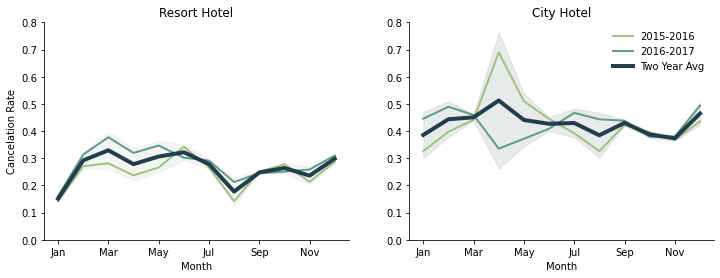

In [8]:
# Plot the monthly cancelation rate curve
colors = ['#a1c181', '#619b8a', '#233d4d']
mean_rh = cancel_month_plt_rh['Two Year Avg']
std_rh = cancel_month_plt_rh['Two Year Avg STD']
mean_ch = cancel_month_plt_ch['Two Year Avg']
std_ch = cancel_month_plt_ch['Two Year Avg STD']

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(121)
cancel_month_plt_rh.plot(x='Month', y='2015-2016', ylim=(0, 0.8), color=colors[0], ylabel='Cancelation Rate', linewidth=2,\
                          ax=ax, legend=False)
cancel_month_plt_rh.plot(x='Month', y='2016-2017', color=colors[1], linewidth=2, ax=ax, legend=False)
cancel_month_plt_rh.plot(x='Month', y='Two Year Avg', color=colors[2], linewidth=4, ax=ax, legend=False)
plt.fill_between(list(range(0, 12)), mean_rh-std_rh, mean_rh+std_rh, color=colors[2], alpha=0.05)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Resort Hotel')

ax = fig.add_subplot(122)
cancel_month_plt_ch.plot(x='Month', y='2015-2016', ylim=(0, 0.8), color=colors[0], linewidth=2, ax=ax)
cancel_month_plt_ch.plot(x='Month', y='2016-2017', color=colors[1], linewidth=2, ax=ax)
cancel_month_plt_ch.plot(x='Month', y='Two Year Avg', color=colors[2], linewidth=4, ax=ax)
plt.fill_between(list(range(0, 12)), mean_ch-std_ch, mean_ch+std_ch, color=colors[2], alpha=0.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False)
ax.set_title('City Hotel')
del cancel_month_plt_rh, cancel_month_plt_ch, mean_rh, mean_ch, std_rh, std_ch, fig, ax

We can conclude from the plot above that:
- The cancelation rate of the resort hotel is overall lower than that of the city hotel.
- The year 2015-2016 has a generally lower cancelation rate than 2016-2017 except for March-June for the city hotel, which may be because that the online booking is becoming more popular.

### 3. Cancelation rate by market segment
It is important to know which market segment tends to has higher cancelation rate.

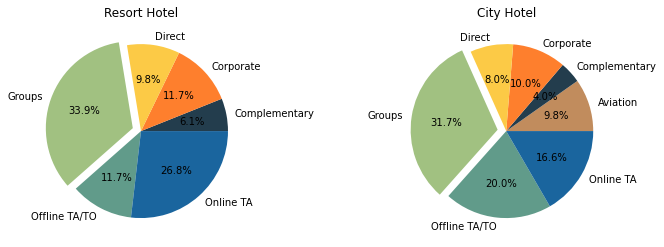

In [9]:
# Calculate the cancelation rate for each market segment
cancel_market_rh = resort_h.groupby(['market_segment'])['is_canceled'].agg(['count', 'sum'])
cancel_market_rh['cancel_rate'] = cancel_market_rh['sum'] / cancel_market_rh['count']
cancel_market_rh.reset_index(inplace=True)
cancel_market_ch = city_h.groupby(['market_segment'])['is_canceled'].agg(['count', 'sum'])
cancel_market_ch['cancel_rate'] = cancel_market_ch['sum'] / cancel_market_ch['count']
cancel_market_ch.reset_index(inplace=True)

# Visualization
colors_rh = ['#233d4d', '#fe7f2d', '#fcca46', '#a1c181', '#619b8a', '#1a659e', '#f7c59f', '#ce796b', '#c18c5d']
colors_ch = ['#c18c5d', '#233d4d', '#fe7f2d', '#fcca46', '#a1c181', '#619b8a', '#1a659e', '#f7c59f', '#ce796b']
labels_rh = cancel_market_rh['market_segment']
labels_ch = cancel_market_ch['market_segment']
explode_rh = (0, 0, 0, 0.1, 0, 0)
explode_ch = (0, 0, 0, 0, 0.1, 0, 0)

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)
ax.pie(cancel_market_rh['cancel_rate'], explode=explode_rh, labels=labels_rh, autopct='%1.1f%%', colors=colors_rh)
ax.set_title('Resort Hotel')
ax = fig.add_subplot(122)
ax.pie(cancel_market_ch['cancel_rate'], explode=explode_ch, labels=labels_ch, autopct='%1.1f%%', colors=colors_ch)
ax.set_title('City Hotel')
del labels_rh, labels_ch, explode_rh, explode_ch, colors_rh, colors_ch

We can see that for both hotels, the market segment **Groups** is the biggest source of the cancelation, followed by **TA/TO**. These three groups altogether comprise make up **around 70%** of the total cancelation.  

#### Select the data entries of bookings that were not canceled in praparation for the subsequent analysis.
In the following analysis we are going to focus on the bookings that were not canceled. We now select the data entries of these bookings and save them in an Excel file in preparation for Tableau analysis.  
  
We also save the data entries / tables produced in this session for furture reference.

In [10]:
# Select valid bookings
booking_rh = resort_h.loc[resort_h['is_canceled']==0, :]
booking_rh = booking_rh.reset_index()
booking_rh = booking_rh.drop(['index', 'is_canceled'], axis=1) # The columns are not informative now

booking_ch = city_h.loc[city_h['is_canceled']==0, :]
booking_ch = booking_ch.reset_index()
booking_ch = booking_ch.drop(['index', 'is_canceled'], axis=1)

# Save the booking data that were not canceled
with pd.ExcelWriter('valid_booking.xlsx') as writer:  
    booking_rh.to_excel(writer, sheet_name='rh')
    booking_ch.to_excel(writer, sheet_name='ch')

print('Number of valid bookings of the resort hotel: ', booking_rh.shape[0], '\n', 'Number of valid bookings of the city hotel: ', booking_ch.shape[0])

# Save the data with canceled bookings.
with pd.ExcelWriter('canceled_booking.xlsx') as writer:  
    cancel_rh.to_excel(writer, sheet_name='rh')
    cancel_ch.to_excel(writer, sheet_name='ch')
    cancel_month_rh.to_excel(writer, sheet_name='rh_by_month')
    cancel_month_ch.to_excel(writer, sheet_name='ch_by_month')
    cancel_market_rh.to_excel(writer, sheet_name='rh_by_market')
    cancel_market_ch.to_excel(writer, sheet_name='ch_by_market')

del cancel_rh, cancel_ch, cancel_month_rh, cancel_month_ch, cancel_market_rh, cancel_market_ch, resort_h, city_h

Number of valid bookings of the resort hotel:  25688 
 Number of valid bookings of the city hotel:  40918


## Produce Repeated Customer Profiles
It is important to understand the features and needs shared by the repeated customers, let's make a profile for these customers.

### 1. Visualize the percentage of the repeated customers

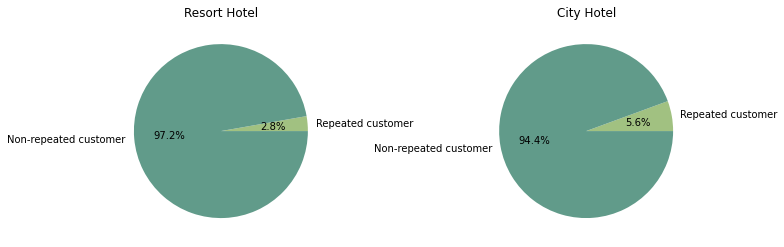

In [11]:
# Separate repeated and non-repeated customers
grouped_rh = booking_rh.groupby('is_repeated_guest')
repeat_rh = grouped_rh.get_group(1).reset_index().drop('index', axis=1)
nrepeat_rh = grouped_rh.get_group(0).reset_index().drop('index', axis=1)

grouped_ch = booking_ch.groupby('is_repeated_guest')
repeat_ch = grouped_ch.get_group(1).reset_index().drop('index', axis=1)
nrepeat_ch = grouped_ch.get_group(0).reset_index().drop('index', axis=1)

# Visualization
pct_repeat_rh = repeat_rh.shape[0] / booking_rh.shape[0]
pie_values_ch = [pct_repeat_rh, 1-pct_repeat_rh]
pct_repeat_ch = repeat_ch.shape[0] / booking_ch.shape[0]
pie_values_rh = [pct_repeat_ch, 1-pct_repeat_ch]

colors = ['#a1c181', '#619b8a']
labels = ['Repeated customer', 'Non-repeated customer']

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)
ax.pie(pie_values_rh, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('Resort Hotel')
ax = fig.add_subplot(122)
ax.pie(pie_values_ch, labels=labels, autopct='%1.1f%%', colors=colors)
ax.set_title('City Hotel')
del grouped_rh, grouped_ch, pct_repeat_rh, pct_repeat_ch, pie_values_rh, pie_values_ch, colors, labels, fig, ax

There are only a small amount of repeated customers for both hotels. Now let's make a detailed profile for them.

### 2. Produce repeated customer profiles
We select some columns that can depict various aspects of a booking: **lead_time**, **stay_length**, **guest_number**, **market_segment**, **customer_type**, **country**, **reserved_room_type**, **meal**, **adr**.  
  
We now compare these variables between repeated and non-repeated customers.

In [12]:
# Functions to prepare the data structure for visualization
# Prepare the DataFrame for Seaborn to plot the numeric varibles
def bar_plt_df(repeat_df, nrepeat_df, cols):
    repeat_tmp = repeat_df.copy()
    repeat_tmp['is_repeat'] = 'Repeat Customer'
    nrepeat_tmp = nrepeat_df.copy()
    nrepeat_tmp['is_repeat'] = 'Non-Repeat Customer'
    df = pd.concat([repeat_tmp, nrepeat_tmp], axis=0)
    
    repeat = []
    var = []
    value = []
    for c in cols:
        tmp = pd.DataFrame({'is_repeat': df['is_repeat'], 'var': c, 'value': df[c]})
        repeat.append(tmp['is_repeat'].tolist())
        var.append(tmp['var'].tolist())
        value.append(tmp['value'].tolist())
        del tmp
    repeat = [item for sublist in repeat for item in sublist]
    var = [item for sublist in var for item in sublist]
    value = [item for sublist in value for item in sublist]
    return pd.DataFrame({'Repeat Customer': repeat, 'Variable': var, 'Value': value})

# Prepare the DataFrane for non-numeric varibles
def count_plt_df(repeat_df, nrepeat_df, variable_name):    
    repeat = repeat_df[variable_name].value_counts().reset_index()
    repeat['pct'] = repeat[variable_name] / repeat[variable_name].sum()
    nrepeat = nrepeat_df[variable_name].value_counts().reset_index()
    nrepeat['pct'] = nrepeat[variable_name] / nrepeat[variable_name].sum()
    tmp = pd.merge(repeat, nrepeat, how='right', on='index')
    tmp = tmp.rename(columns={"index": "Variable", "pct_x": "Repeat Customer", "pct_y": "Non-Repeat Customer"})
    tmp = tmp[['Variable', 'Repeat Customer', 'Non-Repeat Customer']]
    return tmp

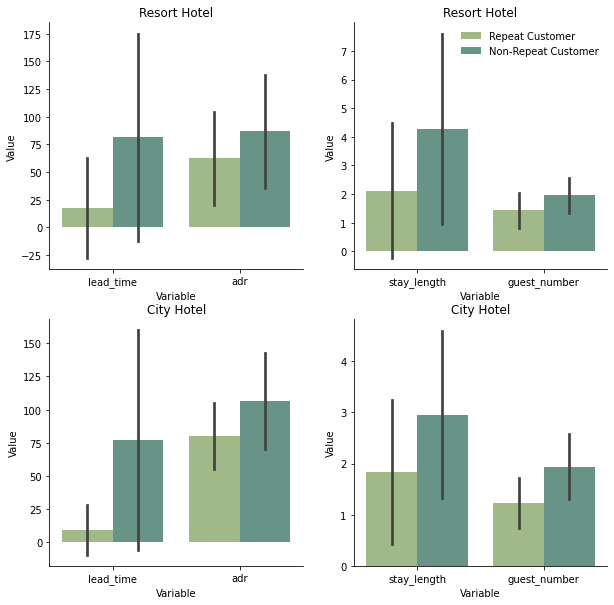

In [13]:
# Columns to do numeric calculation. Two groups have different scale.
cols_num_1 = ['lead_time', 'adr']
cols_num_2 = ['stay_length', 'guest_number'] 

# Visualization
sns.set_palette(sns.color_palette(['#a1c181', '#619b8a']))
titles = ['Resort Hotel', 'Resort Hotel', 'City Hotel', 'City Hotel']
fig = plt.figure(figsize=(10, 10))
for n in range(0, 4):
    if n == 0:
        plt_df = bar_plt_df(repeat_rh, nrepeat_rh, cols_num_1)
    elif n == 1:
        plt_df = bar_plt_df(repeat_rh, nrepeat_rh, cols_num_2)
    elif n == 2:
        plt_df = bar_plt_df(repeat_ch, nrepeat_ch, cols_num_1)
    else:
        plt_df = bar_plt_df(repeat_ch, nrepeat_ch, cols_num_2)
    
    ax = fig.add_subplot(2, 2, n+1)
    ax = sns.barplot(x="Variable", y="Value", hue="Repeat Customer", data=plt_df, ci='sd')
    if n == 1:
        ax.legend(frameon=False)
    else:
        ax.get_legend().remove()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(titles[n])
del titles, fig, ax

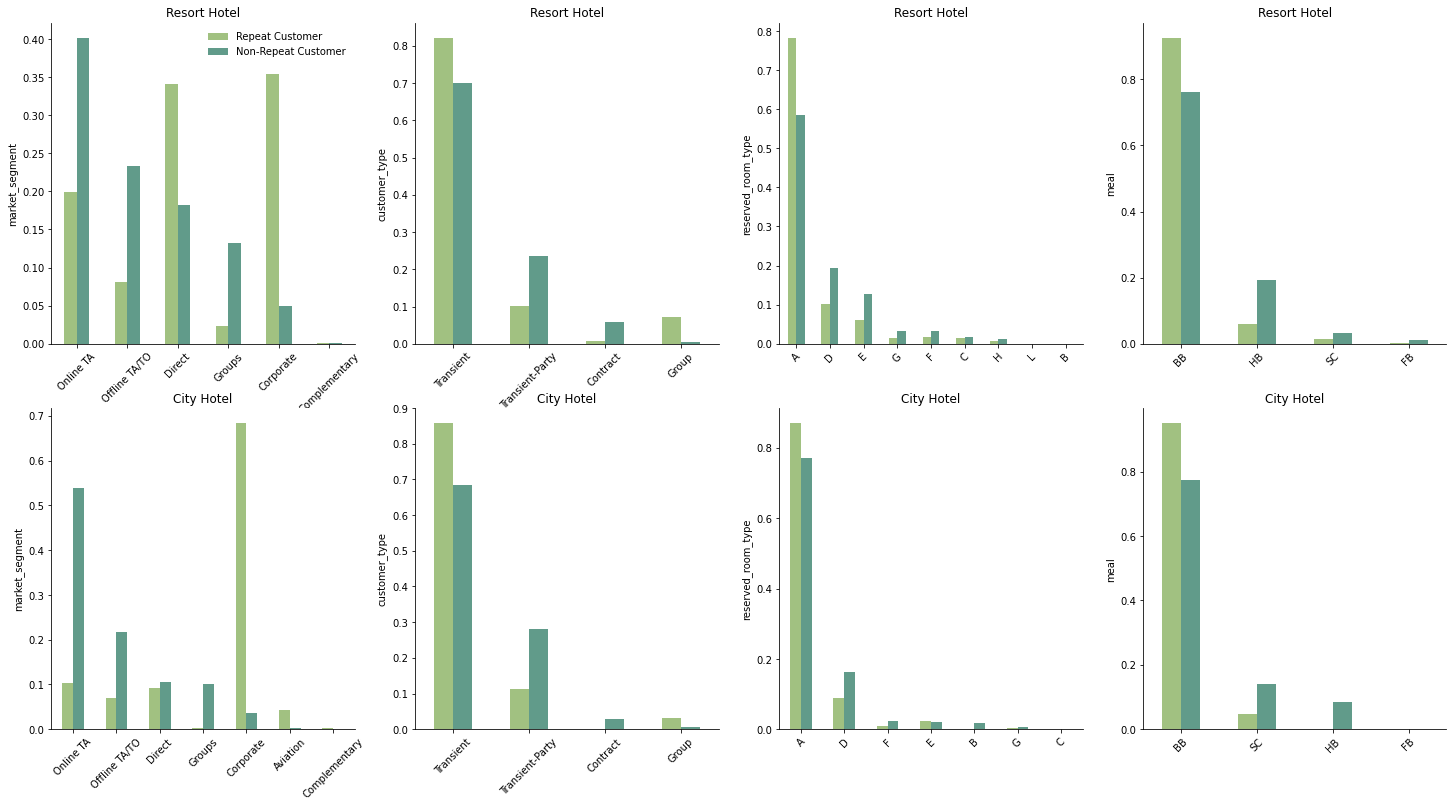

In [14]:
# Non-numeric columns to calculate the percentages
cols_cnt = ['market_segment', 'customer_type', 'reserved_room_type', 'meal']  

# Visualize the non-numeric data
colors = ['#a1c181', '#619b8a']
fig = plt.figure(figsize=(25, 13))
for n in range(0, len(cols_cnt)):
    for m in range(0, 2):
        if m == 0:
            plt_df = count_plt_df(repeat_rh, nrepeat_rh, cols_cnt[n])
            title = 'Resort Hotel'
        else:
            plt_df = count_plt_df(repeat_ch, nrepeat_ch, cols_cnt[n])
            title = 'City Hotel'
        ax = fig.add_subplot(2, 4, n+1+m*4)
        ax = plt_df.plot(kind='bar', ax=ax, rot=45)
        ax.set_xticklabels(plt_df['Variable'].tolist())
        ax.set_ylabel(cols_cnt[n])
        if m == 0 and n == 0:
            ax.legend(frameon=False)
        else:
            ax.get_legend().remove()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(title)
del colors, fig, ax, cols_num_1, cols_num_2, cols_cnt, repeat_ch, repeat_rh, nrepeat_rh, nrepeat_ch

We can see that compared to the non-repeat customers, the repeat customers are more likely to:
- have a shorter lead time;
- stay for a shorter perior of time;
- select the room type with lower average daily rate;
- have less companion;
- come from the corporate market segment;
- be a transient or group customer;
- book the room type A in both hotels (which should be the room type with the lowest average daily rate);
- include only breakfast in the booking.

From all the observaitions above, we speculate that one type of repeat customers can be those travel on business.  

**NOTE**: this is a qualitative analysis more than a quantatitive one, as we can see that the standard deviation is large. In addition, because of the sample size differnce between the repeat and non-repeat customers, an accurate comparison should be done using statistcal methods such as non-parametric permutation test.  
  
## Investigate If the Current Room Configuration Meets the Demand

### 1. The reserved room type percentage

In [15]:
# Function to calculate the number of rooms reserved/assigned of each room type
def pie_room_count(booking_df, res_ass_type):
    cnt_df = booking_df[res_ass_type].value_counts().reset_index()
    tmp_pct = []
    for m in range(0, cnt_df.shape[0]):
        tmp_df = booking_df[booking_df[res_ass_type]==cnt_df['index'][m]]
        tmp_pct.append(tmp_df.shape[0] / booking_df.shape[0])
    return pd.DataFrame({res_ass_type: cnt_df['index'].tolist(), 'pct': tmp_pct}) 

# Function to calculate the revenue of the room types
def pie_room_revenue(booking_df):
    df = booking_df.copy()
    df['revenue'] = df['adr'] * df['stay_length']
    revenue = df.groupby('assigned_room_type').agg('sum')
    revenue['pct'] = revenue['revenue'] / revenue['revenue'].sum()
    revenue = revenue.reset_index()[['assigned_room_type', 'pct']].sort_values(by='pct', ascending=False)
    return revenue

# Function to count the mismatch between the reserved and assigned room type
def room_mismatch(booking_df):
    df = booking_df.copy()
    df['is_mismatch'] = df['reserved_room_type'] == df['assigned_room_type']
    df['is_mismatch'] = df['is_mismatch'].astype('int')
    gp_df = df.groupby('reserved_room_type')['is_mismatch'].agg(['count', 'sum'])
    sum_df = pd.DataFrame([[gp_df['count'].sum(), gp_df['sum'].sum()]], columns=['count' , 'sum'])
    mismatch = pd.concat([gp_df, sum_df]).reset_index()
    mismatch.iloc[-1, 0] = 'All Types'
    mismatch['Mismatch Percentage'] = (mismatch['count'] - mismatch['sum']) / mismatch['count']
    return mismatch

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  import sys


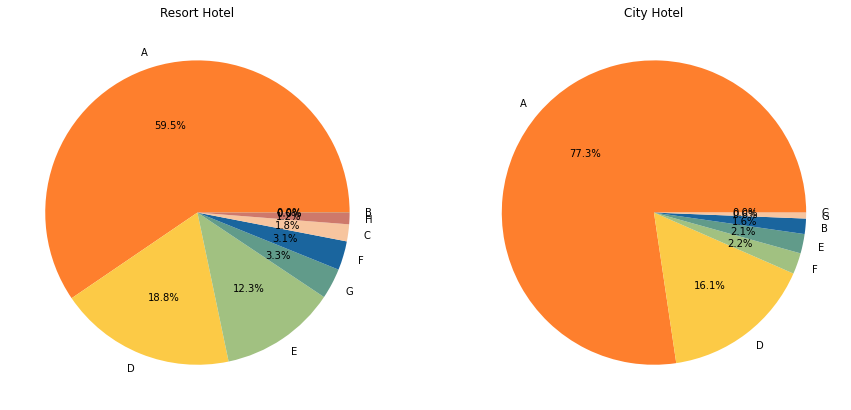

In [16]:
# Plot the overall room demand
colors = ['#fe7f2d', '#fcca46', '#a1c181', '#619b8a', '#1a659e', '#f7c59f', '#ce796b', '#c18c5d', '#233d4d', ]
fig = plt.figure(figsize=(15, 7))

pie_rh = pie_room_count(booking_rh, 'reserved_room_type')
ax = fig.add_subplot(121)
ax.pie(pie_rh['pct'], labels=pie_rh['reserved_room_type'].tolist(), autopct='%1.1f%%', colors=colors)
ax.set_title('Resort Hotel')

pie_ch = pie_room_count(booking_ch, 'reserved_room_type')
ax = fig.add_subplot(122)
ax.pie(pie_ch['pct'], labels=pie_ch['reserved_room_type'].tolist(), autopct='%1.1f%%', colors=colors)
ax.set_title('City Hotel')
del colors, fig, ax, pie_rh, pie_ch

The top three (the resort hotel) / two (the city hotel) room types accounts for 90.6% and 93.4% of the overall reservation. **Can these reservation demands all be met?**  
  
### 2. The reserved-assigned mismatch of each room type

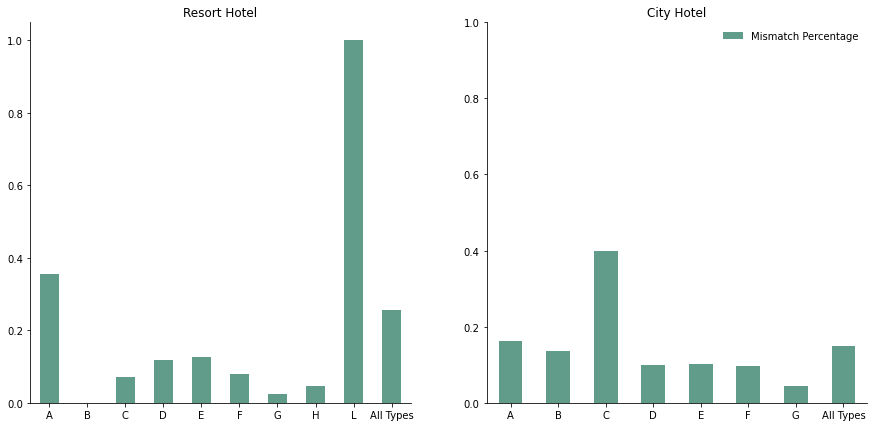

In [17]:
fig = plt.figure(figsize=(15, 7))

mismatch_rh = room_mismatch(booking_rh)
ax = fig.add_subplot(121)
ax = mismatch_rh['Mismatch Percentage'].plot(kind='bar', ax=ax, rot=0, color='#619b8a', legend=False)
ax.set_xticklabels(mismatch_rh['index'].tolist())
# ax.get_legend().remove()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Resort Hotel')

mismatch_ch = room_mismatch(booking_ch)
ax = fig.add_subplot(122)
ax = mismatch_ch['Mismatch Percentage'].plot(kind='bar', ax=ax, rot=0, color='#619b8a', ylim=[0, 1])
ax.set_xticklabels(mismatch_ch['index'].tolist())
ax.legend(frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('City Hotel')
del fig, ax, mismatch_rh, mismatch_ch

- For the resort hotel, the overall *reserved-assigned mismatch* (**RAM**) is arount **30%**. However, this percentage is distorted by the abnormally high *RAM* of the room type **L**, which is **100%**. More attention should be paid into this room type. The *RAM* of the most popular room type **A** is the next highest - almost **40%**. Considering the 59.5% of the booking reservs this room type, actions to be taken to reduce the *RAM* of the room type **A**.
  
- For the city hotel, the *RAM* is overall lower that than or the resort hotel. The *RAM* of the two most demanded room type **A** and **D** are around **10%**.  
  
Then **what are the actual percentages each type of room taken?**
   
### 3. The assigned room type percentage

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  import sys


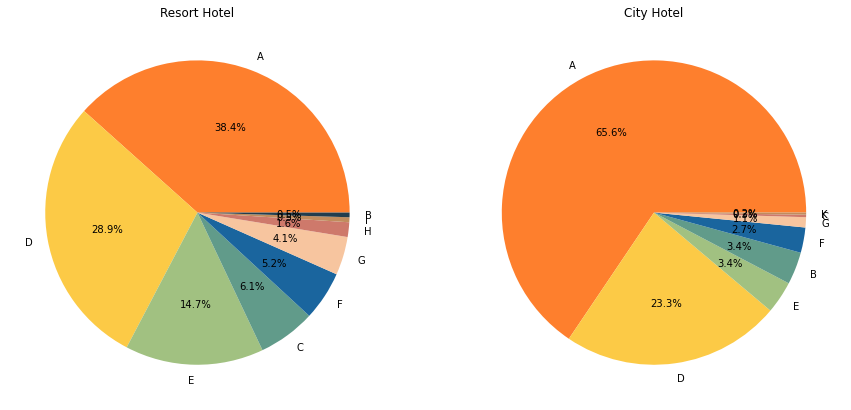

In [18]:
# Plot the actual room demand
colors = ['#fe7f2d', '#fcca46', '#a1c181', '#619b8a', '#1a659e', '#f7c59f', '#ce796b', '#c18c5d', '#233d4d', ]
fig = plt.figure(figsize=(15, 7))

pie_rh = pie_room_count(booking_rh, 'assigned_room_type')
ax = fig.add_subplot(121)
ax.pie(pie_rh['pct'], labels=pie_rh['assigned_room_type'].tolist(), autopct='%1.1f%%', colors=colors)
ax.set_title('Resort Hotel')

pie_ch = pie_room_count(booking_ch, 'assigned_room_type')
ax = fig.add_subplot(122)
ax.pie(pie_ch['pct'], labels=pie_ch['assigned_room_type'].tolist(), autopct='%1.1f%%', colors=colors)
ax.set_title('City Hotel')
del colors, fig, ax, pie_rh, pie_ch

For the resort hotel, **A**, **D**, **E** are still the most commonly assigned room types. However, **21.1%** customers did not get their reserved room type (**A**). It is likely that these customers got **D** or **E**. Other room types such as **C**, **F**, **G** are assigned to these custoemrs too.
  
For the city hotel, **A** and **D** are still the most assigned room types. However, **11.7%** customers did not get their reserved room type (**A**).  
  
### 4. The revenue contribution from each room type
Since there is a big gap between the reserced and assigned room type, does it worth it to renovate some of the under-reserved room types to those short in supply? 

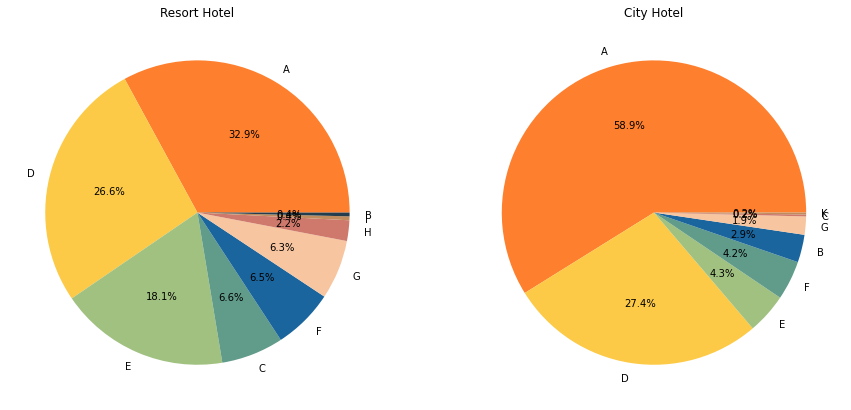

In [19]:
colors = ['#fe7f2d', '#fcca46', '#a1c181', '#619b8a', '#1a659e', '#f7c59f', '#ce796b', '#c18c5d', '#233d4d']
fig = plt.figure(figsize=(15, 7))

pie_rh = pie_room_revenue(booking_rh)
ax = fig.add_subplot(121)
ax.pie(pie_rh['pct'], labels=pie_rh['assigned_room_type'].tolist(), autopct='%1.1f%%', colors=colors)
ax.set_title('Resort Hotel')

pie_ch = pie_room_revenue(booking_ch)
ax = fig.add_subplot(122)
ax.pie(pie_ch['pct'], labels=pie_ch['assigned_room_type'].tolist(), autopct='%1.1f%%', colors=colors)
ax.set_title('City Hotel')
del colors, fig, ax, pie_rh, pie_ch

We can tell that those less reserved room types tend to be more profitable. More information are needed to help make suggestions about achieving the balance between the meet the room type demand and sell mthe room type with high profit.